In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
import logging

In [ ]:
logging.

In [2]:
model_path = r'C:\Solar-Flare-Forecast\Models\All_Models\XGBoost.joblib'
model = joblib.load(model_path)

c:\Users\jyusu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.8.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\jyusu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.8.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\jyusu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Ordi

In [18]:
df = pd.read_csv(r'C:\Solar-Flare-Forecast\Data\Engineered_Data\Engineered_Data.csv')

In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
y

0      C
1      M
2      M
3      M
4      M
      ..
536    X
537    X
538    X
539    X
540    X
Name: Class, Length: 541, dtype: object

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_test

,speed,Region,Year,Month,Day,start_hour,start_minute,end_hour,end_minute,duration_min,start_hour_sin,start_hour_cos,quarter,day_of_year,region_activity
229,10786,6.668228,2005,7,13,14,1,15,38,938,-5.000000e-01,-0.866025,3,194,1.791759
73,9213,9.128479,2000,11,8,22,42,0,5,5,-5.000000e-01,0.866025,4,313,0.693147
352,11748,7.466799,2013,5,13,15,48,16,16,976,-7.071068e-01,-0.707107,2,133,1.945910
86,9236,9.131405,2000,11,25,0,59,2,1,121,0.000000e+00,1.000000,4,330,1.386294
470,13088,8.035926,2022,8,26,12,24,12,38,758,1.224647e-16,-1.000000,3,238,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,8040,8.182280,2002,7,29,10,27,11,13,673,5.000000e-01,-0.866025,3,210,3.433987
46,8731,9.074750,1999,10,14,8,54,9,3,543,8.660254e-01,-0.500000,4,287,0.693147
93,9393,9.147826,2001,3,29,9,57,10,32,632,7.071068e-01,-0.707107,1,88,2.079442
407,12297,7.739794,2015,3,10,3,19,3,28,208,7.071068e-01,0.707107,1,69,1.791759


In [ ]:
mapping = {'B': 0, 'C': 1, 'M': 2, 'X': 3}
y_test = y_test.map(mapping)

In [30]:
y_test

229    2
73     3
352    3
86     3
470    2
      ..
148    2
46     3
93     3
407    2
182    2
Name: Class, Length: 109, dtype: int64

In [22]:
preprocessor = model.named_steps['preprocessor']
xgb_model = model.named_steps['model']

In [23]:
y_pred = xgb_model.predict(X_test)

In [32]:
y_pred

array([2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2,
       1, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 2, 3, 0, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 2, 1, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2])

In [33]:
np.array(y_test)

array([2, 3, 3, 3, 2, 3, 0, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 2, 1, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 1, 2, 2, 3,
       3, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 2, 2])

In [36]:
# Calculating erors 
errors = y_test - y_pred
abs_errors = np.abs(errors)

In [37]:
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors,
    'Absolute Error': abs_errors
})

In [38]:
error_df = error_df.reset_index(drop=True)
x_test_reset = X_test.reset_index(drop=True)

In [39]:
error_analysis_df = pd.concat([x_test_reset, error_df], axis=1)

In [40]:
print("Error DataFrame created successfully!")
error_analysis_df.head()

Error DataFrame created successfully!


,speed,Region,Year,Month,Day,start_hour,start_minute,end_hour,end_minute,duration_min,start_hour_sin,start_hour_cos,quarter,day_of_year,region_activity,Actual,Predicted,Error,Absolute Error
0,10786,6.668228,2005,7,13,14,1,15,38,938,-5.000000e-01,-0.866025,3,194,1.791759,2,2,0,0
1,9213,9.128479,2000,11,8,22,42,0,5,5,-5.000000e-01,0.866025,4,313,0.693147,3,2,1,1
2,11748,7.466799,2013,5,13,15,48,16,16,976,-7.071068e-01,-0.707107,2,133,1.945910,3,3,0,0
3,9236,9.131405,2000,11,25,0,59,2,1,121,0.000000e+00,1.000000,4,330,1.386294,3,3,0,0
4,13088,8.035926,2022,8,26,12,24,12,38,758,1.224647e-16,-1.000000,3,238,1.098612,2,2,0,0


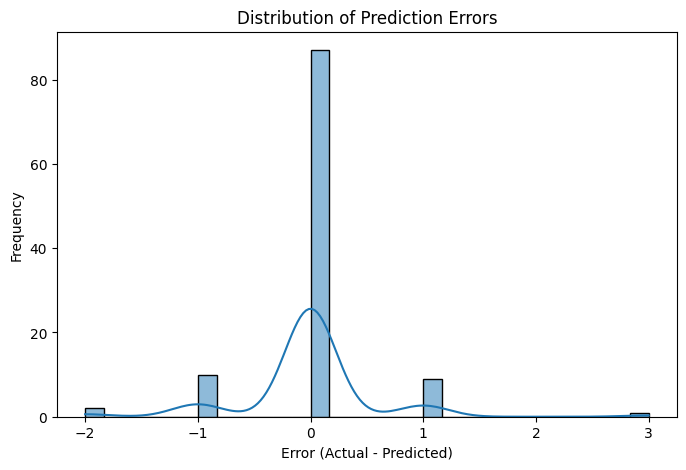

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

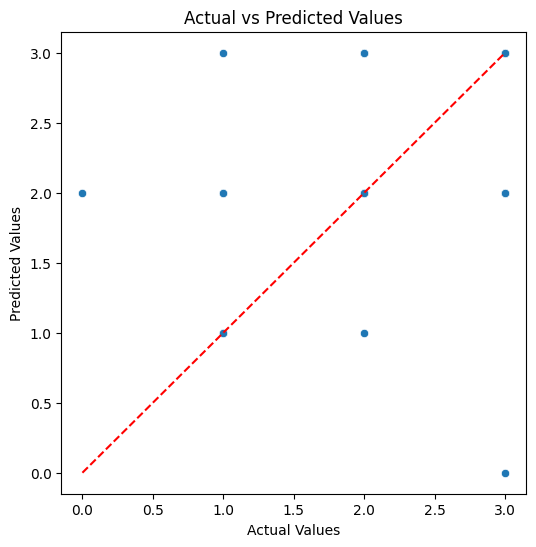

In [42]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()